In [88]:
#loading all required libraries to work with
from sklearn import datasets as skd # for iris dataset loading
from sklearn.cluster import KMeans #for kmeans algorithm
from matplotlib import pyplot as plt #for ploting
from scipy.cluster.vq import vq
from numpy import vstack,array #for array
import pandas as pd #for dataset
import numpy as np #for math operations and array 
import math #for square root and euc distance

In [89]:
#loading iris data set 
iris = skd.load_iris()
print(iris.target)
#display of class labels

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [90]:
X = iris.data[:, :2] #taking 2 features for simplicity
y = iris.target #storing classes in y 

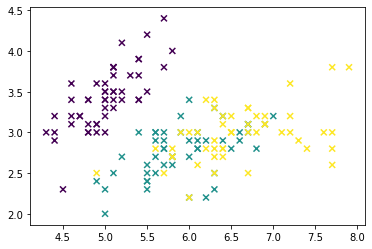

In [91]:
plt.scatter(X[:,0], X[:,1], c=y, marker='x')
plt.show()
#initail drawing the labels to see how distribution is

In [92]:
#kmeans algorithm running and result returned with 3 clusters
totalElements = len(y)
kmeans = KMeans(copy_x=True, init='k-means++',
n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
random_state=1, verbose=0)
pred_y = kmeans.fit(X)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

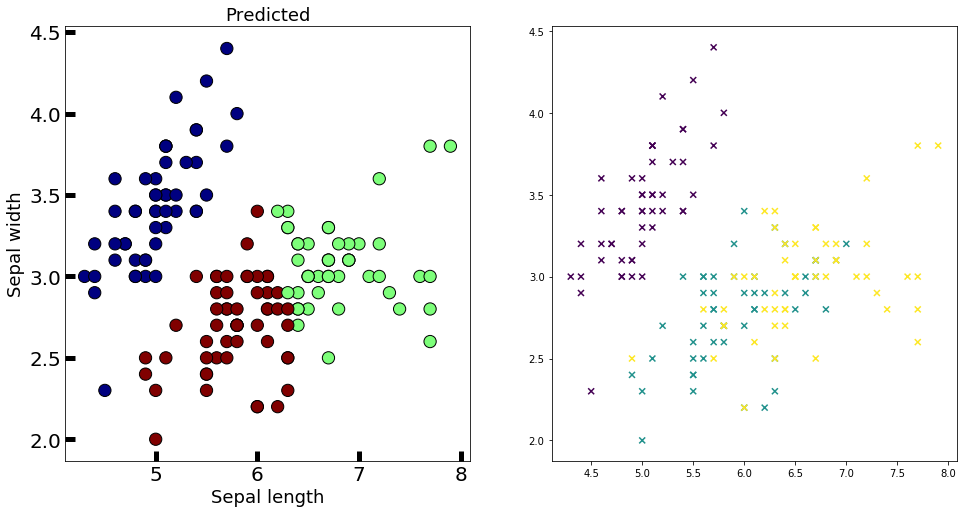

In [93]:
#graph to show clustered values and comparision with orignal
fig,axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Predicted', fontsize=18)

plt.scatter(X[:,0], X[:,1], c=y, marker='x')
plt.show()

In [94]:
#calculation for entropy and purity
#to get the actual values we need to first get orignal features for which data is distributed

def ClusterIndices(clustNum, labels_array): 
    return np.where(labels_array == clustNum)[0]

def LabelIndices(labelId, labelArray):
    return np.where(labelArray==labelId)

def LabelIndices(labelId, labelArray):
    return np.where(labelArray==labelId)

def ComputeCorrectPredictions(knownLabelArray, clusteredArray):
    return np.isin(knownLabelArray, clusteredArray).sum()


AllClusterIndices = []
AllClusterIndices.append(ClusterIndices(0, kmeans.labels_))
AllClusterIndices.append(ClusterIndices(1, kmeans.labels_))
AllClusterIndices.append(ClusterIndices(2, kmeans.labels_))


knownLabel_1 = []
knownLabel_2 = []
knownLabel_3 = []

def GetClusterLabels(cluster):
    label_1 = 0
    label_2 = 0 
    label_3 = 0
    knownLabel = []
    for i in cluster:
            if(y[i] == 0):
                label_1 += 1
            elif(y[i] == 1):
                label_2 += 1
            else:
                label_3 += 1
    knownLabel.append(label_1)
    knownLabel.append(label_2)
    knownLabel.append(label_3)
    return knownLabel
                
knownLabel_1 = GetClusterLabels(AllClusterIndices[0])
knownLabel_2 = GetClusterLabels(AllClusterIndices[1])
knownLabel_3 = GetClusterLabels(AllClusterIndices[2])
#print(knownLabel_1)
#print(knownLabel_2)
#print(knownLabel_3)

cluster_total = []
cluster_total.append(knownLabel_1[0] + knownLabel_1[1] + knownLabel_1[2])
cluster_total.append(knownLabel_2[0] + knownLabel_2[1] + knownLabel_2[2])
cluster_total.append(knownLabel_3[0] + knownLabel_3[1] + knownLabel_3[2])

def entropyMultiplyer(val, total):
    if(val == 0):
        return 0
    else:
        return (val/total * (math.log2(val/total)))

cluster_entropy = []

cluster_entropy.append(-1 * (entropyMultiplyer(knownLabel_1[0], cluster_total[0]) + entropyMultiplyer(knownLabel_1[1], cluster_total[0]) + entropyMultiplyer(knownLabel_1[2], cluster_total[0])))
        
cluster_entropy.append(-1 * (entropyMultiplyer(knownLabel_2[0], cluster_total[1]) + entropyMultiplyer(knownLabel_2[1], cluster_total[1]) + entropyMultiplyer(knownLabel_2[2], cluster_total[1])))
        
cluster_entropy.append(-1 * (entropyMultiplyer(knownLabel_3[0], cluster_total[2]) + entropyMultiplyer(knownLabel_3[1], cluster_total[2]) + entropyMultiplyer(knownLabel_3[2], cluster_total[2])))
    
total_entropy = (cluster_entropy[0] * (cluster_total[0]/ totalElements)) + (cluster_entropy[1] * (cluster_total[0] / totalElements)) + (cluster_entropy[2] * (cluster_total[0]/ totalElements))

print("Entropy for cluster is " +  str(total_entropy))

cluster_purity = max(knownLabel_1) + max(knownLabel_2) + max(knownLabel_3)/totalElements

print("Purity of kmeans clusters is " + str(cluster_purity))

Entropy for cluster is 0.5597107086899646
Purity of kmeans clusters is 85.25333333333333


In [99]:
#For cohession calculation euclidean distance is used between the points in a cluster
def CalculateEucDitance(x,y, clc):
    return np.sqrt((x-clc[0])**2 + (y-clc[1])**2)

indCohession = []
i = 0
total = 0
for indCluster in AllClusterIndices:
    for xi, yi in X[indCluster]:
        total += CalculateEucDitance(xi, yi, kmeans.cluster_centers_[i])
    indCohession.append(total)
    total = 0    
    print("Cohession for cluster " + str(i) +" is " +str(indCohession[i]))
    i += 1
print("Total Cohession is " + str(sum(indCohession)))
print("Average Cohession is " + str(sum(indCohession)/len(AllClusterIndices)))

Cohession for cluster 0 is 21.40727858436923
Cohession for cluster 1 is 20.274848543005348
Cohession for cluster 2 is 21.081897998656057
Total Cohession is 62.76402512603063
Average Cohession is 20.921341708676877


In [96]:
#For separation between clusters euc. distance is used between cluster centroids.
#This is proto typed based calculation

def CalculateSeparation(ci, ci_):
     return np.sqrt((ci[0]-ci_[0])**2 + (ci[1]-ci_[0])**2)

indSeparation = []
indSeparation.append(CalculateSeparation(kmeans.cluster_centers_[0], kmeans.cluster_centers_[1]))
indSeparation.append(CalculateSeparation(kmeans.cluster_centers_[0], kmeans.cluster_centers_[2]))
indSeparation.append(CalculateSeparation(kmeans.cluster_centers_[1], kmeans.cluster_centers_[2]))
print("separation (C1, C2), (C1, C3), (C2, C3)")
print("")
print("Separation C1, C2 is " + str(indSeparation[0]))
print("Separation C1, C3 is " + str(indSeparation[1]))
print("Separation C2, C3 is " + str(indSeparation[2]))

print("Total Separation is " + str(sum(indSeparation)))

separation (C1, C2), (C1, C3), (C2, C3)

Separation C1, C2 is 3.836801247351691
Separation C1, C3 is 2.467986048797572
Separation C2, C3 is 2.8922532512540218
Total Separation is 9.197040547403285
